In [43]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter

# from sklearn.datasets import load_boston
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [45]:
df = pd.read_csv('/Volumes/Debbie 1T/BDSE35-1_Final Project_2/data/實價登錄房價_266019row_cleaned.csv')
plt.rcParams['font.family'] = 'Heiti TC'

In [46]:
df.shape

(266019, 57)

In [47]:
df.isnull().sum()

鄉鎮市區                         0
土地位置建物門牌                     0
交易年月日                        0
建築完成年月                   34022
建物移轉總面積平方公尺                  0
有無管理組織                       0
總價元                          0
單價元平方公尺                      0
備註                      187524
編號                           0
緯度                           0
經度                           0
bad_count                    0
good_count                   0
建築型態清整                       0
陽台有無                         0
是否含額外土地                      0
建築型態_住商大樓                    0
建築型態_公寓                      0
建築型態_其他                      0
建築型態_透天厝                     0
房地總價元                        0
格局比例_房                       0
格局比例_廳                       0
格局比例_衛                       0
格局比例_隔間                      0
是否包含車位                       0
建材_磚石                        0
建材_鋼筋                        0
建材_鋼骨                        0
建材_竹木                        0
住                            0
商       

In [48]:
pd.set_option('display.max_rows', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266019 entries, 0 to 266018
Data columns (total 57 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   鄉鎮市區                  266019 non-null  object 
 1   土地位置建物門牌              266019 non-null  object 
 2   交易年月日                 266019 non-null  object 
 3   建築完成年月                231997 non-null  float64
 4   建物移轉總面積平方公尺           266019 non-null  float64
 5   有無管理組織                266019 non-null  object 
 6   總價元                   266019 non-null  int64  
 7   單價元平方公尺               266019 non-null  float64
 8   備註                    78495 non-null   object 
 9   編號                    266019 non-null  object 
 10  緯度                    266019 non-null  float64
 11  經度                    266019 non-null  float64
 12  bad_count             266019 non-null  float64
 13  good_count            266019 non-null  float64
 14  建築型態清整                266019 non-null  object 
 15  

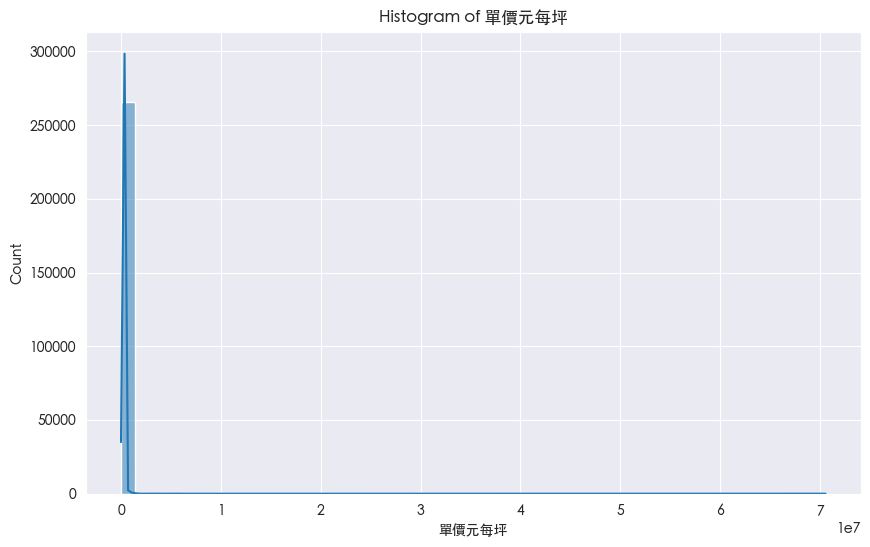

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df['單價元每坪'], bins=50, kde=True)
plt.title('Histogram of 單價元每坪')
plt.show()

In [50]:
print(df['單價元每坪'].describe())

count    2.660190e+05
mean     1.870447e+05
std      2.168308e+05
min      0.000000e+00
25%      1.207471e+05
50%      1.670612e+05
75%      2.316727e+05
max      7.056588e+07
Name: 單價元每坪, dtype: float64


In [51]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500'],
      dtype='object')

In [52]:
# 查看這些欄位的統計描述
print(df[['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']].describe())

# 查看這些欄位的唯一值及其出現次數
for col in ['格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間']:
    print(f"\n{col} 的唯一值分佈:")
    print(df[col].value_counts())


              格局比例_房         格局比例_廳         格局比例_衛        格局比例_隔間
count  266019.000000  266019.000000  266019.000000  266019.000000
mean        0.371507       0.216604       0.281635       0.128160
std         0.074469       0.073742       0.079162       0.059350
min         0.000000       0.000000       0.000000       0.000000
25%         0.333333       0.181818       0.250000       0.090909
50%         0.375000       0.222222       0.272727       0.125000
75%         0.400000       0.250000       0.333333       0.142857
max         1.000000       1.000000       1.000000       1.000000

格局比例_房 的唯一值分佈:
格局比例_房
3.750000e-01    71029
3.333333e-01    38487
4.000000e-01    27497
2.857143e-01    20459
4.444444e-01    14216
4.285714e-01    12622
3.636364e-01    12552
4.545455e-01    11104
4.166667e-01     9712
5.000000e-01     9370
2.500000e-01     8673
3.846154e-01     6857
0.000000e+00     3163
3.571429e-01     2988
3.000000e-01     2658
4.615385e-01     2209
3.076923e-01     1514
2.000000e

In [53]:
df['比例總和'] = df['格局比例_房'] + df['格局比例_廳'] + df['格局比例_衛'] + df['格局比例_隔間']
print(df['比例總和'].describe())


count    266019.000000
mean          0.997906
std           0.044718
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: 比例總和, dtype: float64


In [54]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['移轉層次_騎樓'] == 1:
        return '騎樓'
    elif row['移轉層次_屋頂'] == 1:
        return '屋頂'
    elif row['移轉層次_一二樓'] == 1:
        return '一二樓'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['移轉層次'] = df.apply(get_building_type, axis=1)



In [55]:
# 創建一個函數，根據 One-Hot 編碼欄位的值返回類別標籤
def get_building_type(row):
    if row['建築型態_住商大樓'] == 1:
        return '住商大樓'
    elif row['建築型態_公寓'] == 1:
        return '公寓'
    elif row['建築型態_透天厝'] == 1:
        return '透天厝'
    elif row['建築型態_其他'] == 1:
        return '其他'
    else:
        return '未知'

# 應用函數，創建新的類別型欄位
df['建築型態'] = df.apply(get_building_type, axis=1)



In [56]:
# 定義函數，根據 One-Hot 編碼欄位返回建材類別
def get_material_type(row):
    if row['建材_磚石'] == 1:
        return '磚石'
    elif row['建材_鋼筋'] == 1:
        return '鋼筋'
    elif row['建材_鋼骨'] == 1:
        return '鋼骨'
    elif row['建材_竹木'] == 1:
        return '竹木'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['建材種類'] = df.apply(get_material_type, axis=1)



In [57]:
# 定義函數，根據 One-Hot 編碼欄位返回土地用途類別
def get_land_use_type(row):
    if row['住'] == 1:
        return '住'
    elif row['商'] == 1:
        return '商'
    elif row['工'] == 1:
        return '工'
    elif row['農'] == 1:
        return '農'
    else:
        return '未知'  # 處理可能的缺失值或異常值

# 應用函數，創建新的類別型欄位
df['土地用途'] = df.apply(get_land_use_type, axis=1)




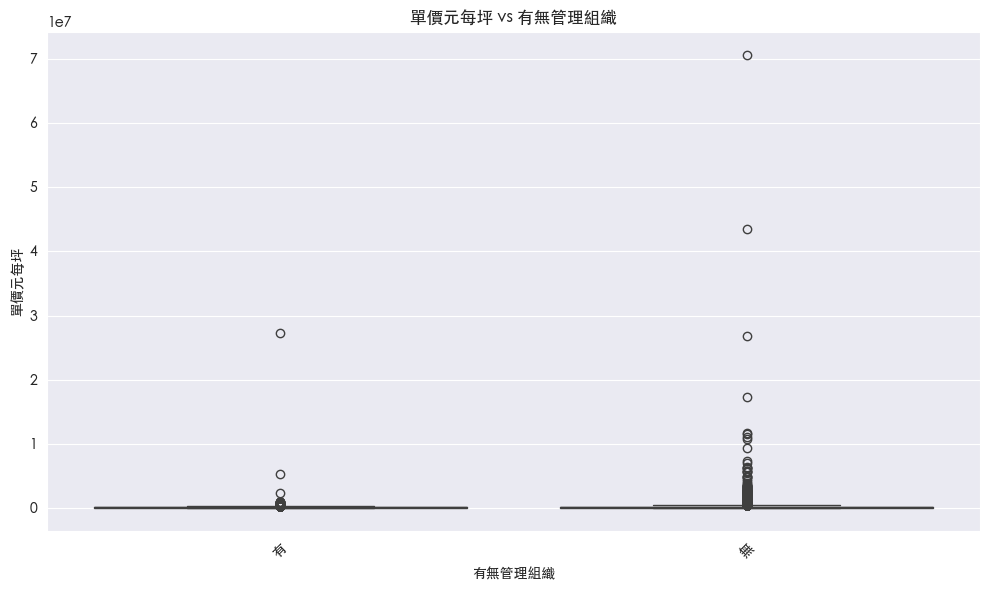

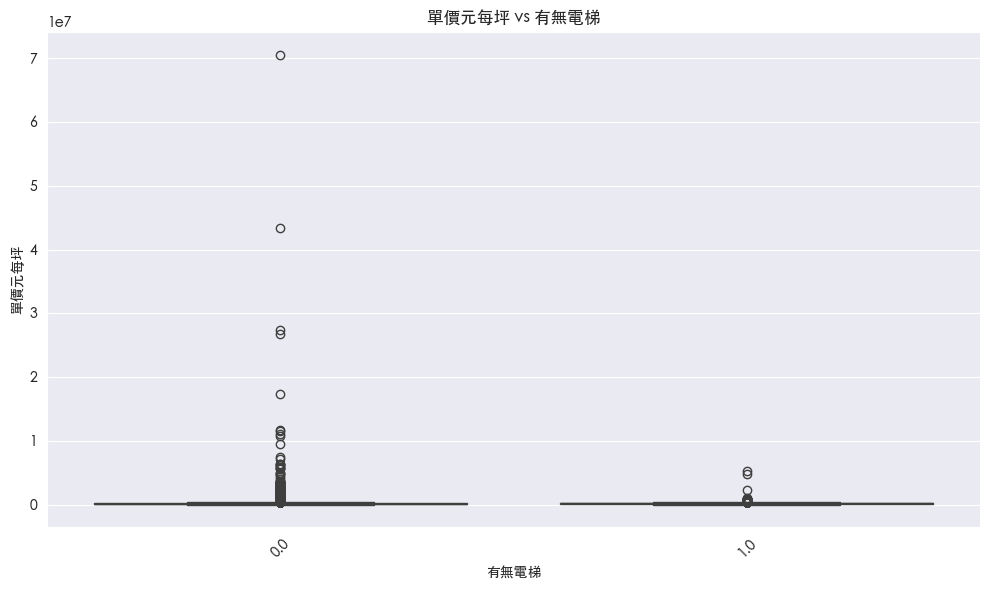

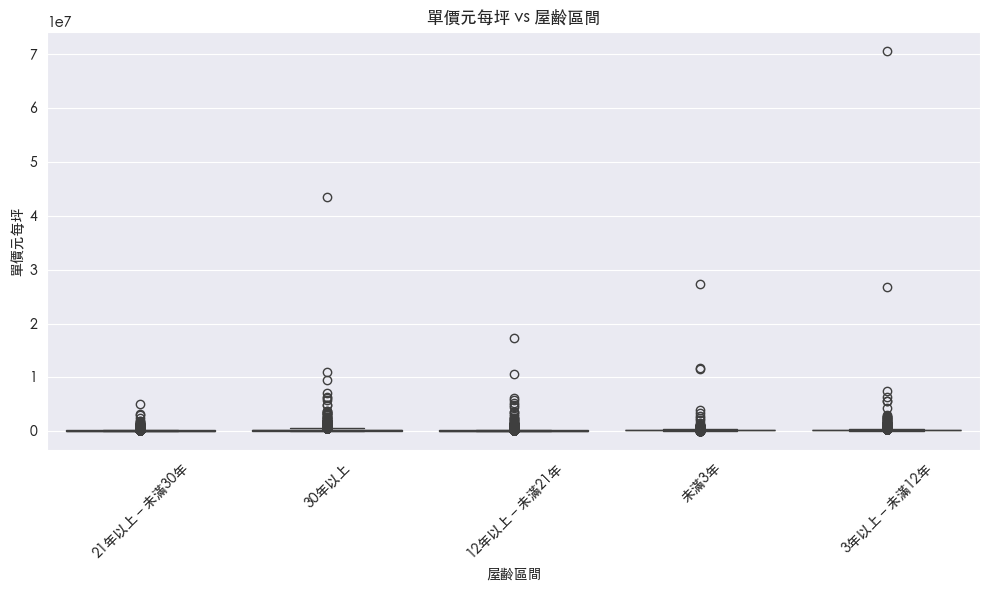

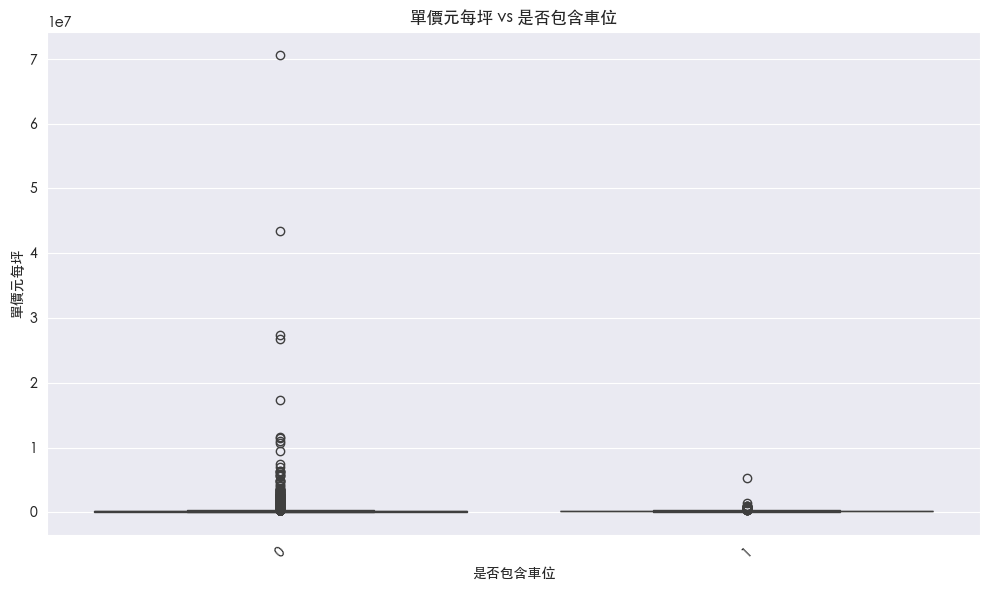

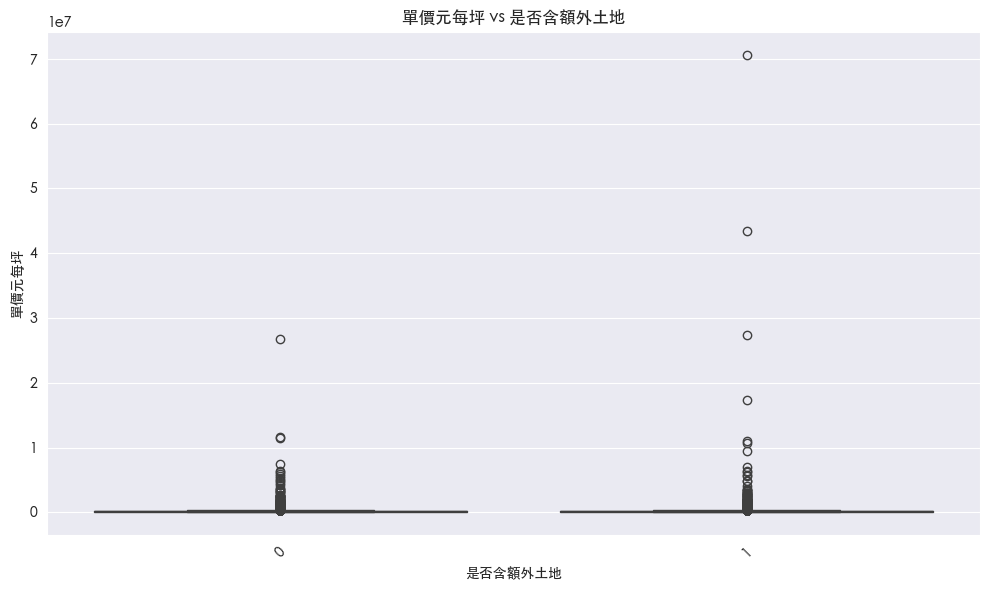

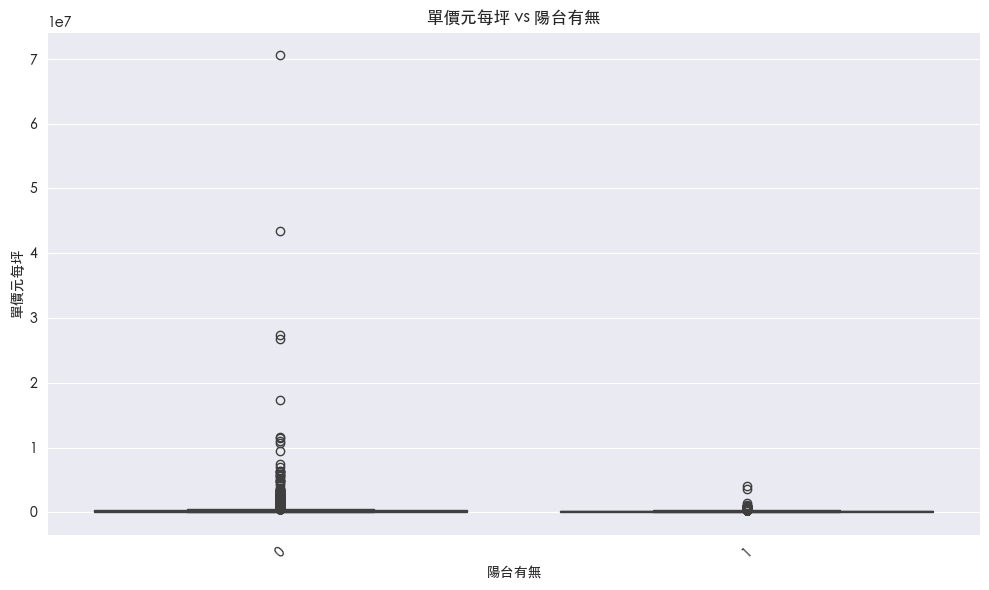

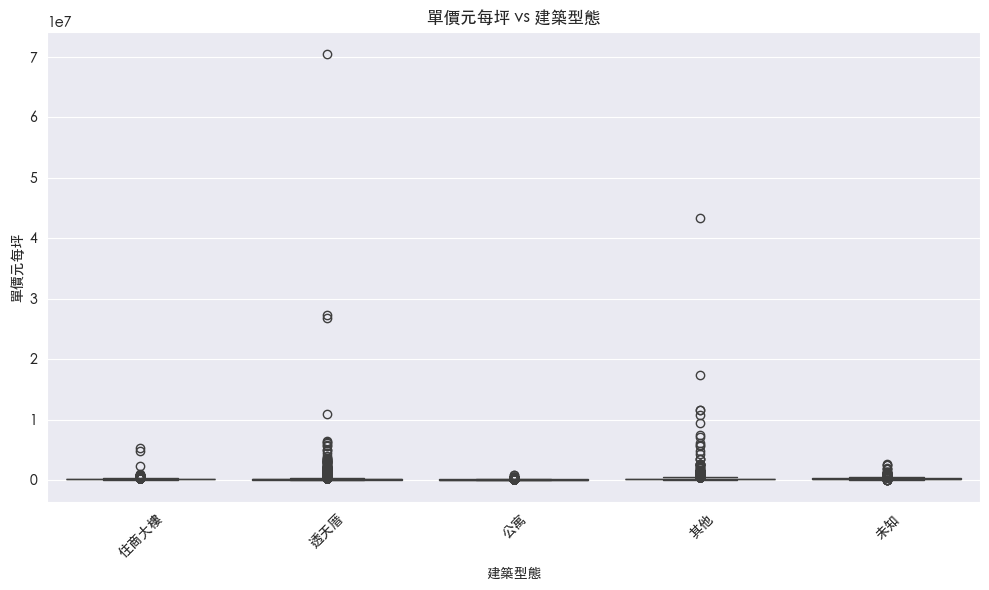

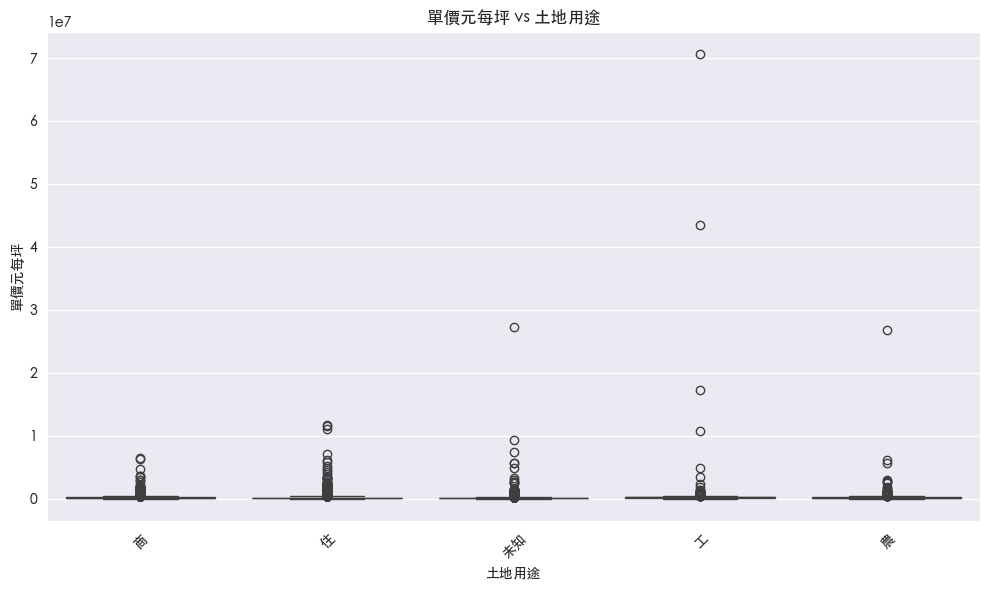

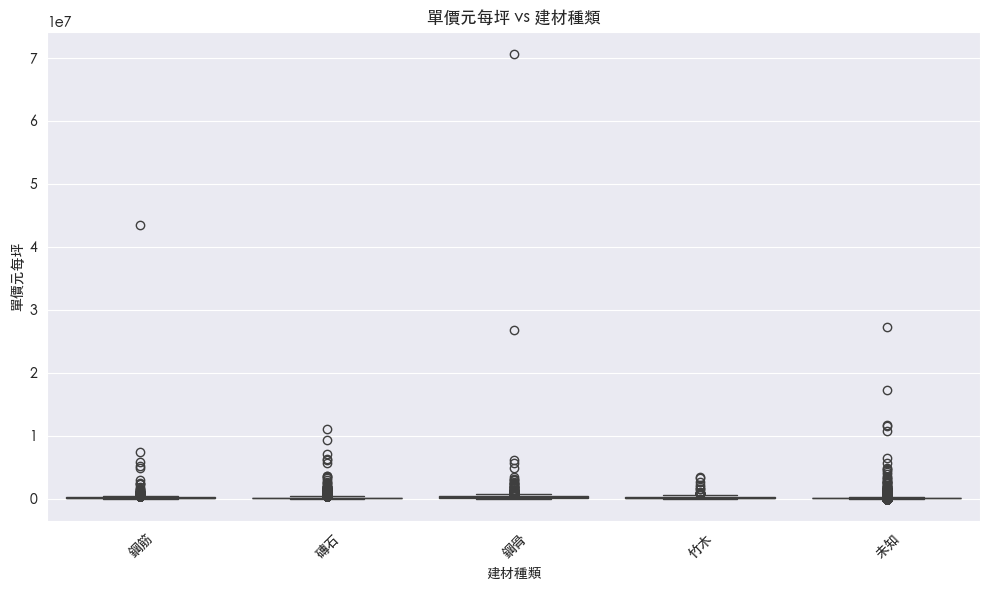

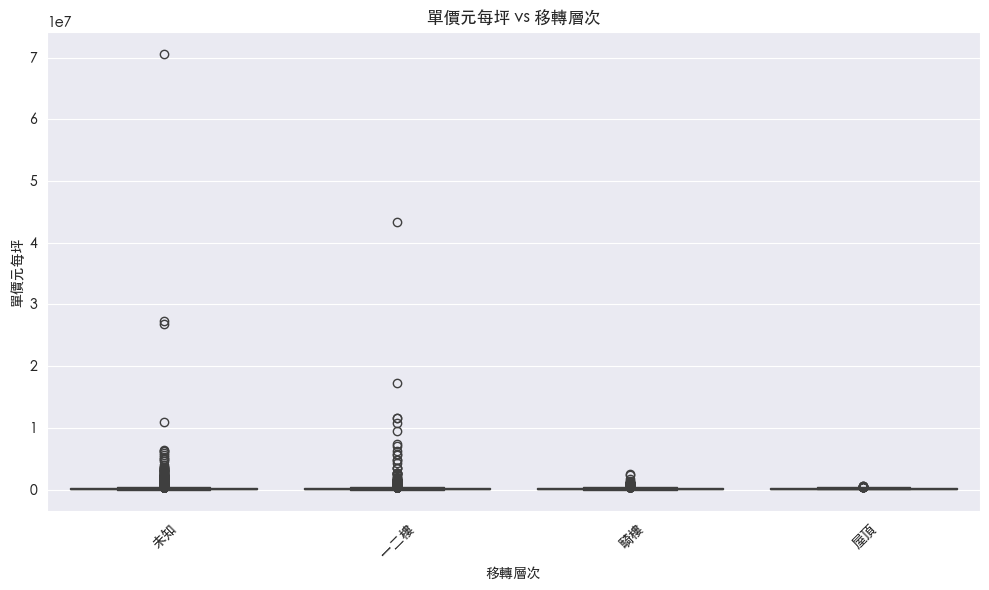

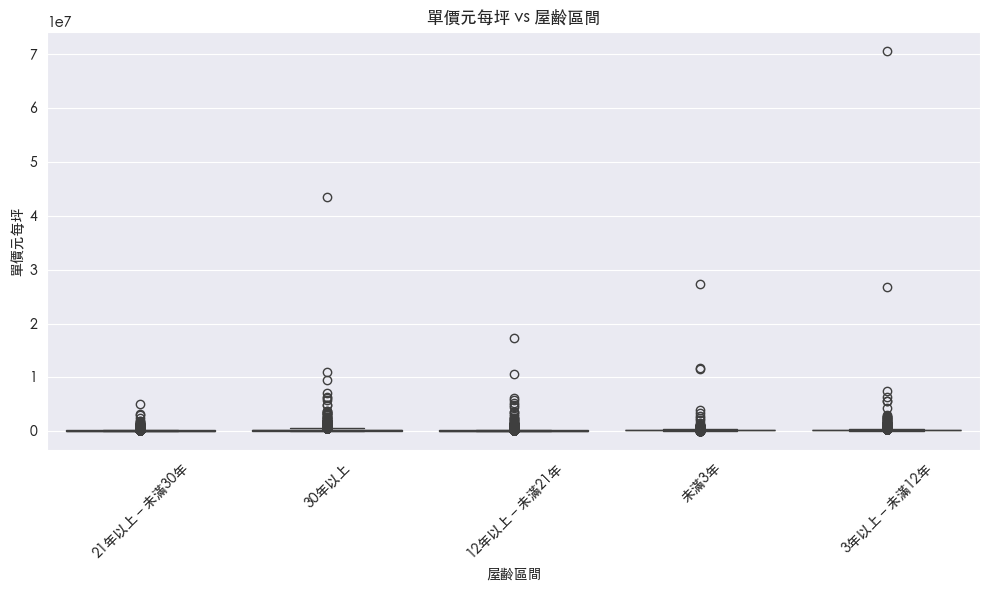

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# 定義需要比較的分類變數
categorical_vars = [
    '有無管理組織', '有無電梯', '屋齡區間', '是否包含車位', '是否含額外土地','陽台有無','建築型態', '土地用途','建材種類','移轉層次','屋齡區間'
]

# 遍歷每個分類變數，繪製對應的 Boxplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=var, y='單價元每坪')
    plt.title(f'單價元每坪 vs {var}')
    plt.xlabel(var)
    plt.ylabel('單價元每坪')
    plt.xticks(rotation=45)  # 如果分類變數有多個類別，可以選擇旋轉 x 軸標籤
    plt.tight_layout()
    plt.show()


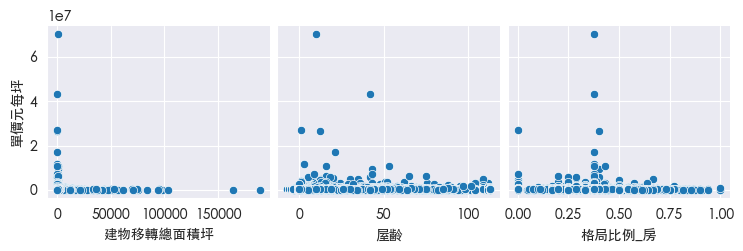

In [59]:
sns.pairplot(df, x_vars=['建物移轉總面積坪', '屋齡', '格局比例_房'], y_vars='單價元每坪')
plt.show()


In [ ]:
ax = sns.lmplot(x = '交易年份', y = '單價元每坪', data=df, hue='建築型態_住商大樓', palette='Set2')

In [60]:
df.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯', 'Region',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       '屋齡區間', 'good_count_0_500', 'good_count_500_1000',
       'good_count_1000_1500', 'bad_count_0_500', 'bad_count_500_1000',
       'bad_count_1000_1500', '比例總和', '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [61]:
import statsmodels.api as sm
from scipy import stats

使用 VIF（方差膨脹因子） 來檢查多重共線性問題。VIF 大於 10 通常表示該變數存在嚴重的多重共線性，可以考慮移除該變數。
- Building Type - Commercial and Residential Bui...        inf
- Building Type - Townhouse  39.144169
- Elevator (Code)        inf

In [62]:
# 篩選出非數值型的欄位
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64'])

# 查看這些欄位的名稱
print(non_numeric_columns.columns)

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '有無管理組織', '備註', '編號', '建築型態清整', 'Region',
       '屋齡區間', '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')


In [63]:
# 篩選出非數值型的欄位
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# 查看這些欄位的名稱
print(numeric_columns.columns)

Index(['建築完成年月', '建物移轉總面積平方公尺', '總價元', '單價元平方公尺', '緯度', '經度', 'bad_count',
       'good_count', '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位',
       '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', '有無電梯',
       '建物移轉總面積坪', '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡',
       'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
       'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '比例總和'],
      dtype='object')


In [64]:
X = df[['建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓','陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝','格局比例_房', '格局比例_廳', '格局比例_隔間', '是否包含車位','有無電梯','建物移轉總面積坪', '屋齡']]

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)


      feature        VIF
0       建材_磚石   1.450859
1       建材_鋼筋   7.770623
2       建材_鋼骨   1.081221
3       建材_竹木   1.016507
4           住   8.471392
5           商   2.510060
6           工   1.257887
7           農   1.209122
8     移轉層次_騎樓   1.250822
9     移轉層次_屋頂   1.154083
10   移轉層次_一二樓   1.439239
11       陽台有無   8.887893
12    是否含額外土地   1.587707
13  建築型態_住商大樓        inf
14    建築型態_公寓   3.107810
15    建築型態_其他   2.622983
16   建築型態_透天厝   6.831974
17     格局比例_房  19.641762
18     格局比例_廳  10.507731
19    格局比例_隔間   6.283230
20     是否包含車位   3.519368
21       有無電梯        inf
22   建物移轉總面積坪   1.322733
23         屋齡   3.701897


In [66]:
# 1. 找出 VIF 大於 10 的變數
high_vif_features = vif_data[vif_data["VIF"] > 10]["feature"]
high_vif_features

# 2. 刪除這些變數，並檢查是否存在
for feature in high_vif_features:
    if feature in df.columns:
        df_vif = df.drop(columns=[feature])
        print(f"已刪除變數: {feature}")
    else:
        print(f"變數不存在: {feature}")

# 3. 重新檢查清理後的數據
print("清理後的數據:")
print(df_vif.head())


已刪除變數: 建築型態_住商大樓
已刪除變數: 格局比例_房
已刪除變數: 格局比例_廳
已刪除變數: 有無電梯
清理後的數據:
  鄉鎮市區               土地位置建物門牌       交易年月日    建築完成年月  建物移轉總面積平方公尺 有無管理組織  \
0  中西區  臺南市中西區金華路三段２１８號十五樓之１７  2022-09-02  840704.0        43.51      有   
1   北區     臺南市北區南園街１２７巷１５１弄３號  2022-08-01  640322.0        69.20      無   
2  佳里區        臺南市佳里區麻興路二段５３１號  2022-08-04  890919.0       130.97      無   
3  新化區       臺南市新化區中正路６６２巷２２號  2022-08-01  650600.0       110.40      無   
4  中西區        臺南市中西區南寧街１３６巷９號  2022-08-01  510000.0        81.05      無   

        總價元   單價元平方公尺                     備註                   編號  ...  \
0   2170000   49874.0                    NaN  RPVOMLLJRHHGFAD08DA  ...   
1   4500000   65029.0                    NaN  RPOOMLSJQHHGFAD97DA  ...   
2   8440000   64442.0  親友、員工、共有人或其他特殊關係間之交易；  RPQNMLKKQHHGFGD97DA  ...   
3   1200000   10870.0  親友、員工、共有人或其他特殊關係間之交易；  RPSOMLPJQHHGFHD78DA  ...   
4  10600000  130783.0                    NaN  RPPNMLKKQHHGFAD37EA  ...   

   good_count_500_1000  good_count_1000

In [67]:
df_vif.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region', '建物移轉總面積坪',
       '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡', '屋齡區間',
       'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
       'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '比例總和',
       '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [68]:
# 設定特徵欄位
X_columns = ['建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓','陽台有無', '是否含額外土地', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '格局比例_隔間', '是否包含車位','建物移轉總面積坪', '屋齡']

# 選擇特徵和標籤
X = df_vif[X_columns]  # 特徵 X
y = df_vif['單價元每坪']  # 標籤 y

# 查看特徵與標籤
print(X.head())  # 查看 X 的前幾行
print('---'*20)
print(y.head())  # 查看 y 的前幾行

   建材_磚石  建材_鋼筋  建材_鋼骨  建材_竹木  住  商  工  農  移轉層次_騎樓  移轉層次_屋頂  移轉層次_一二樓  陽台有無  \
0      0      1      0      0  0  1  0  0        0        0         0     1   
1      1      1      0      0  1  0  0  0        0        0         0     0   
2      0      0      1      0  0  0  0  0        0        0         0     0   
3      1      1      0      0  0  0  0  0        0        0         0     0   
4      1      0      0      0  1  0  0  0        0        0         0     0   

   是否含額外土地  建築型態_公寓  建築型態_其他  建築型態_透天厝   格局比例_隔間  是否包含車位    建物移轉總面積坪  屋齡  
0        0        0        0         0  0.250000       0  143.834705  27  
1        0        0        0         1  0.142857       0  228.760322  47  
2        1        0        0         1  0.125000       0  432.958661  22  
3        0        0        0         1  0.111111       0  364.958664  46  
4        1        0        0         1  0.100000       0  267.933874  60  
------------------------------------------------------------
0    164872.72

In [69]:
df_vif['單價元每坪'].isna().sum()

0

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)

In [71]:
print(f"Shape of X_train:{X_train.shape}")
print(f"Shape of X_test:{X_test.shape}")
print(f"Shape of y_train:{y_train.shape}")
print(f"Shape of y_test{y_test.shape}")

Shape of X_train:(186213, 20)
Shape of X_test:(79806, 20)
Shape of y_train:(186213,)
Shape of y_test(79806,)


### LinearRegression

In [72]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [73]:
from sklearn.metrics import r2_score

# R2 score，即決定係數，反映Y的全部變異能通過迴歸關係被所有X解釋的比例。
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# RMSE一般指均方根誤差(標準誤差)，可衡量預測值和實際值之間的平均差異，藉此估計預測模型預測目標值的準確度
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_linear_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))

print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.05858781713997929
R2_score (test):  0.05965911446535732
RMSE:  211314.37472760948
RMSE:  208073.76574508936


1. R-squared 與 Adjusted R-squared 值：
- R-squared: 0.211：模型解釋了 21.1% 的變異性，這表明該模型只能解釋單價變化的一小部分。可能還有許多未包含在模型中的重要特徵，或者現有特徵與單價的相關性不夠高。
- Adjusted R-squared: 0.211：調整後的 R-squared 值與 R-squared 值相同，表明模型中沒有太多不必要的變數，但整體解釋能力依然較低。
2. P 值與顯著性：
- 大部分變數的 P 值 很小（接近 0），表明這些變數對於解釋目標變數（log_Unit_Price）是顯著的。
- 但一些變數的 P 值很高，如 Building Type - Commercial and Residential Building 和 Building Type - Apartment，P 值遠大於 0.05，表明它們對目標變數的解釋能力不顯著，可能需要考慮從模型中移除。
3. 係數的解釋：
- Layout Rooms：係數為 -0.577，表明房間數量每增加一個，單價（對數變換後）會下降 0.577 個單位。這可能暗示較大房屋反而單位面積的單價較低。
- Layout Bathrooms：係數為 1.1126，顯示衛浴數量增加對單價有顯著的正向影響。
Parking Included (Code)：係數為 0.2822，表示有停車位的房產單價顯著更高。
4. 多重共線性問題：
- Cond. No.（條件數）：6.10e+14：這是一個非常高的值，通常條件數超過 30 就表示有潛在的多重共線性問題。回歸結果中也指出「這可能表明存在強烈的多重共線性或設計矩陣是奇異的」。
- 多重共線性會導致回歸係數不穩定，變數之間的關係難以區分，影響模型的解釋能力和穩定性。

### Polynomial regression

In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [75]:
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_poly2_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))

print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_train)
print("RMSE: ", rmse_test)

R2_score (train):  0.09347719889641914
R2_score (test):  0.07548356797359301
RMSE:  207361.6786751872
RMSE:  206315.56080931285


#### degree = 3
- R2_score (train):  0.4323312197654634
- R2_score (test):  0.2797326616449679
- RMSE:  0.3647352829620128
- RMSE:  0.4107381312900227

### Lasso regression

In [76]:
from sklearn.linear_model import LassoCV

# 使用 LassoCV 自動選擇最佳 alpha 值
lasso_cv = LassoCV(alphas=[0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0], cv=5)
lasso_cv.fit(X_train, y_train)

# 得到最佳 alpha
best_alpha = lasso_cv.alpha_
print(f"選擇的最佳 alpha: {best_alpha}")

# 預測訓練集和測試集
y_pred_lasso_train = lasso_cv.predict(X_train)
y_pred_lasso_test = lasso_cv.predict(X_test)

# 計算 R2 和 RMSE
r2_score_lasso_train = r2_score(y_train, y_pred_lasso_train)
r2_score_lasso_test = r2_score(y_test, y_pred_lasso_test)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train, y_pred_lasso_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test, y_pred_lasso_test))

print(f"訓練集 R2_score: {r2_score_lasso_train}")
print(f"測試集 R2_score: {r2_score_lasso_test}")
print(f"訓練集 RMSE: {rmse_lasso_train}")
print(f"測試集 RMSE: {rmse_lasso_test}")


選擇的最佳 alpha: 5.0
訓練集 R2_score: 0.05858670791365528
測試集 R2_score: 0.059659230193294444
訓練集 RMSE: 211314.49921898652
測試集 RMSE: 208073.7529412494


In [78]:
lasso = Lasso(alpha = 5) # , positive=True
lasso.fit(X_train,y_train)

y_pred_lasso_train = lasso.predict(X_train)
r2_score_lasso_train = lasso.score(X_train, y_train)

y_pred_lasso_test = lasso.predict(X_test)
r2_score_lasso_test = lasso.score(X_test, y_test)

rmse_lasso_train = (np.sqrt(mean_squared_error(y_train, y_pred_lasso_train)))
rmse_lasso_test = (np.sqrt(mean_squared_error(y_test, y_pred_lasso_test)))

print("coef：")
for i, j in zip(df_vif.columns, lasso.coef_):
    print(i, j)

coef：
鄉鎮市區 -19605.07133252194
土地位置建物門牌 -29001.07508233034
交易年月日 105856.04329048724
建築完成年月 6313.158866935556
建物移轉總面積平方公尺 29279.44665206189
有無管理組織 32114.95957999974
總價元 73531.20006015849
單價元平方公尺 41386.73546183374
備註 -37718.684833493455
編號 -43326.67727013798
緯度 -7073.614105575496
經度 -33201.979496721324
bad_count 11658.973535730156
good_count -45923.027111238356
建築型態清整 114783.69841844281
陽台有無 16899.19993980731
是否含額外土地 -53783.35523550937
建築型態_住商大樓 35319.715673525374
建築型態_公寓 -3.394766803843463
建築型態_其他 545.77563993254


In [79]:
print("R2_score (train): ",r2_score_lasso_train)
print("R2_score (test):", r2_score_lasso_test)
print("train_RMSE: ", rmse_lasso_train)
print("test_RMSE: ", rmse_lasso_test)

R2_score (train):  0.05858670791365528
R2_score (test): 0.059659230193294444
train_RMSE:  211314.49921898652
test_RMSE:  208073.7529412494


### Ridge regression

In [80]:
from sklearn.linear_model import Ridge

In [81]:
from sklearn.linear_model import RidgeCV
import numpy as np

# 定義一組可能的 alpha 值範圍
alphas = np.logspace(-6, 6, 13)  # 這會產生一組從 10^-6 到 10^6 的 alpha 值

# 使用 RidgeCV 進行交叉驗證來選擇最佳 alpha
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)  # store_cv_values=True 會保存每個 alpha 的交叉驗證結果
ridge_cv.fit(X_train, y_train)

# 獲取最佳的 alpha
best_alpha = ridge_cv.alpha_
print(f"選擇的最佳 alpha: {best_alpha}")

# 獲取最佳模型的 R2 分數
r2_train = ridge_cv.score(X_train, y_train)
r2_test = ridge_cv.score(X_test, y_test)

print(f"訓練集 R²: {r2_train}")
print(f"測試集 R²: {r2_test}")


選擇的最佳 alpha: 100.0
訓練集 R²: 0.05856744907084899
測試集 R²: 0.059734356305344405


In [82]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridgeReg = Ridge(alpha=100)

# 訓練模型
ridgeReg.fit(X_train, y_train)

# 預測訓練集和測試集
y_pred_ridge_train = ridgeReg.predict(X_train)
y_pred_ridge_test = ridgeReg.predict(X_test)

# 計算 R2 和 RMSE
r2_score_ridge_train = ridgeReg.score(X_train, y_train)
r2_score_ridge_test = ridgeReg.score(X_test, y_test)

rmse_ridge_train = np.sqrt(mean_squared_error(y_train, y_pred_ridge_train))
rmse_ridge_test = np.sqrt(mean_squared_error(y_test, y_pred_ridge_test))

# 打印結果
print(f"R2_score (train): {r2_score_ridge_train}")
print(f"R2_score (test): {r2_score_ridge_test}")
print(f"RMSE (train): {rmse_ridge_train}")
print(f"RMSE (test): {rmse_ridge_test}")

# 打印每個特徵的係數
print("coef：")
for feature_name, coef in zip(X_columns, ridgeReg.coef_):
    print(feature_name, coef)


R2_score (train): 0.058567449070848765
R2_score (test): 0.059734356358997376
RMSE (train): 211316.6606776912
RMSE (test): 208065.4410101007
coef：
建材_磚石 -19609.936396741246
建材_鋼筋 -29149.44887412624
建材_鋼骨 102377.33123016918
建材_竹木 6954.38172320533
住 28426.381612477024
商 31095.78745287564
工 69548.25035615293
農 40034.28495657882
移轉層次_騎樓 -36366.58888124036
移轉層次_屋頂 -38267.59321715868
移轉層次_一二樓 -7159.079594821765
陽台有無 -33216.7733577675
是否含額外土地 11605.960496280823
建築型態_公寓 -45174.39457844891
建築型態_其他 113630.28537167766
建築型態_透天厝 17268.5468839193
格局比例_隔間 -46431.06199072628
是否包含車位 35535.223503895395
建物移轉總面積坪 -3.2934041331457298
屋齡 546.5465742376562


### Random Forest Regressor
預測
- 訓練數據的高擬合度：模型在訓練數據上的 MSE 低，R² 分數接近 1，這說明模型對訓練數據的擬合度非常高。
- 測試數據上的表現下降：測試數據的 MSE 遠高於訓練數據，R² 分數有所下降，這可能表明模型存在過度擬合問題，
即模型在訓練數據上學習得太好，但在未見過的數據上（測試集）表現較差。

In [83]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn import metrics

In [84]:
df_vif.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region', '建物移轉總面積坪',
       '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡', '屋齡區間',
       'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
       'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '比例總和',
       '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [85]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# 選擇特徵和標籤
X_columns = ['建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓','陽台有無', '是否含額外土地', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '格局比例_隔間', '是否包含車位','建物移轉總面積坪', '屋齡']

# 選擇特徵 X 和標籤 y
X = df[X_columns]
y = df['單價元每坪']

# 拆分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Rfr = rfr(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1)

# 訓練模型
Rfr.fit(X_train, y_train)

x_train_pred = Rfr.predict(X_train)
x_test_pred = Rfr.predict(X_test)

# 對訓練集和測試集進行預測
y_train_pred = Rfr.predict(X_train)
y_test_pred = Rfr.predict(X_test)

mse_train = metrics.mean_squared_error(y_train, x_train_pred)
mse_test = metrics.mean_squared_error(y_test, x_test_pred)

print('MSE train data: {:,.3f}, MSE test data: {:,.3f}'.format(mse_train, mse_test))

r2_train = metrics.r2_score(y_train, x_train_pred)
r2_test = metrics.r2_score(y_test, x_test_pred)

print('R2 train data: {:.3f}, R2 test data: {:.3f}'.format(r2_train, r2_test))

# # 計算 MSE
# mse_train = metrics.mean_squared_error(y_train, y_train_pred)
# mse_test = metrics.mean_squared_error(y_test, y_test_pred)

# print('MSE train data: {:,.3f}, MSE test data: {:,.3f}'.format(mse_train, mse_test))

# # 計算 R2 分數
# r2_train = metrics.r2_score(y_train, y_train_pred)
# r2_test = metrics.r2_score(y_test, y_test_pred)

# print('R2 train data: {:.3f}, R2 test data: {:.3f}'.format(r2_train, r2_test))


MSE train data: 5,966,615,604.952, MSE test data: 39,936,241,158.825
R2 train data: 0.874, R2 test data: 0.133


##### 方法一：
Rfr = rfr(n_estimators = 100, criterion='squared_error', random_state=1, n_jobs=-1)
- MSE train data: 58,465,739.686, MSE test data: 178,763,816.031
- R2 train data: 0.873, R2 test data: 0.611

##### 方法二：
###### 數據標準化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### 初始化 RandomForestRegressor 模型
Rfr = rfr(n_estimators=200, max_depth=10, random_state=1, n_jobs=-1)
- MSE train data: 222,432,872.838, MSE test data: 230,092,501.094
- R2 train data: 0.516, R2 test data: 0.499

### 模型的 預測值 與 實際值 之間的關係
1. 總體來看，大部分預測值和實際值接近紅色參考線，說明模型具有一定的預測能力。
2. 訓練數據 的預測較為精確，這可以從藍色點大多緊貼紅線得出結論。
3. 測試數據 的預測誤差相對較大，尤其在高價位的部分房地產上，模型的預測值偏低，這可能表明模型對某些極端數據的擬合效果不夠好，或者存在過擬合現象。

### 殘差圖
1. 模型在低價位房地產的預測效果較好：低價位的殘差較集中，且誤差較小，這表明模型在預測低價位的房地產時表現得更穩定。
2. 模型在高價位房地產的預測效果較差：圖中的橙色叉號在高價位區域的殘差變異較大，並且一些點偏離紅色參考線較遠，說明模型對高價位房地產的預測準確性較低。這可能與模型未能充分捕捉數據中的某些高價位特徵有關。

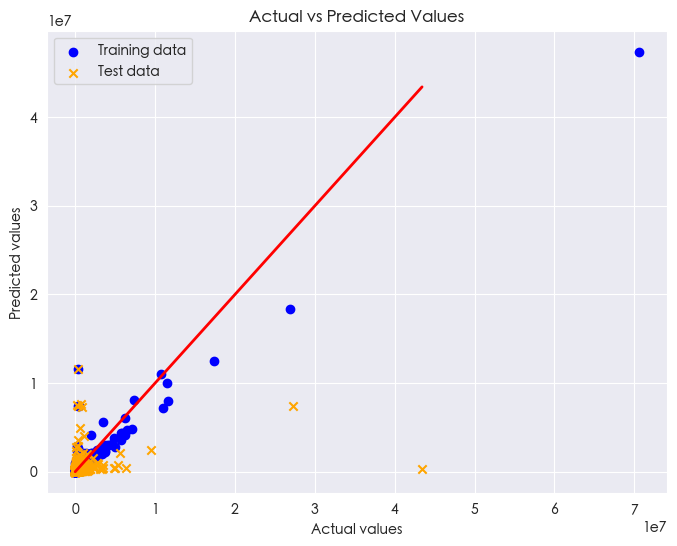

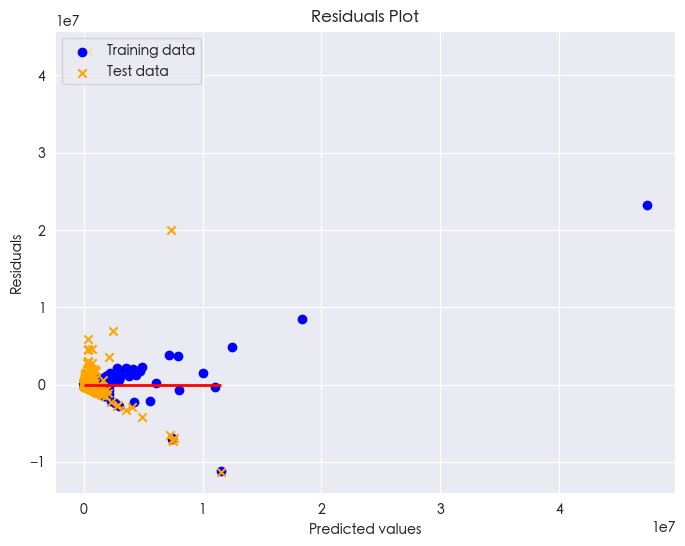

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# 模型預測值與實際值的散點圖
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test, y_test_pred, c='orange', marker='x', label='Test data')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted Values')
plt.legend(loc='upper left')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)  # 劃一條 y=x 參考線
plt.show()

# 殘差圖
plt.figure(figsize=(8, 6))
plt.scatter(y_train_pred, y_train - y_train_pred, c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred, y_test - y_test_pred, c='orange', marker='x', label='Test data')
plt.hlines(y=0, xmin=min(y_test_pred), xmax=max(y_test_pred), color='red', lw=2)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend(loc='upper left')
plt.show()


Feature importance ranking
1. 建物移轉總面積坪 (0.613)
2. 屋齡 (0.164)
3. 格局比例_隔間 (0.048)
4. 建材_鋼骨 (0.024)
5. 農 (0.022)
6. 建築型態_透天厝 (0.020)
7. 建築型態_其他 (0.020)
8. 工 (0.016)
9. 是否含額外土地 (0.015)
10. 建材_鋼筋 (0.013)


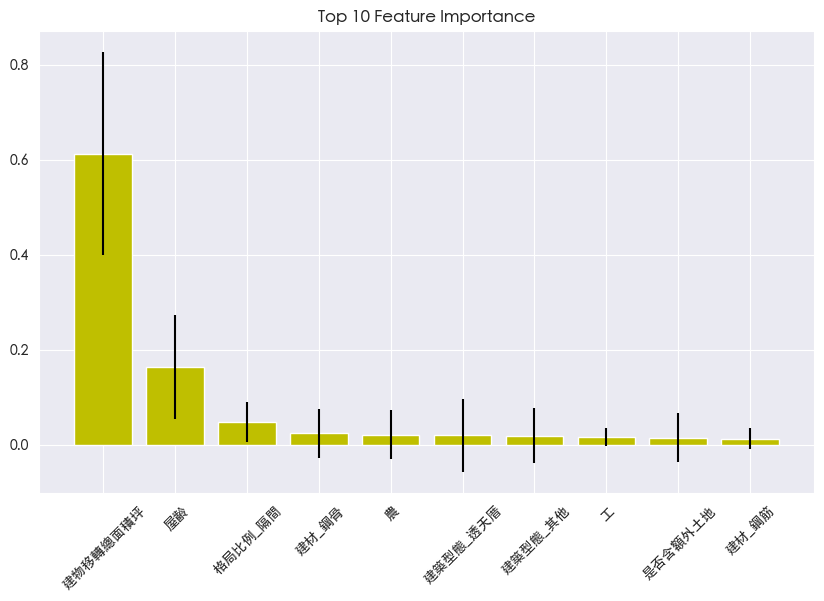

In [87]:
print('Feature importance ranking')

importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]  # 按重要性從大到小排序

variables = ['建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓',
       '移轉層次_屋頂', '移轉層次_一二樓','陽台有無', '是否含額外土地', '建築型態_公寓', '建築型態_其他',
       '建築型態_透天厝', '格局比例_隔間', '是否包含車位','建物移轉總面積坪', '屋齡']

importance_list = []

# 遍歷前 10 個特徵並打印排名
for f in range(10):  # 只取前 10 名
    variable = variables[indices[f]]  # 從 indices 中提取對應的變量名稱
    importance_list.append(variable)
    print("%d. %s (%.3f)" % (f + 1, variable, importances[indices[f]]))

# 繪製前 10 個特徵的重要性圖
plt.figure(figsize=(10, 6))
plt.title('Top 10 Feature Importance')
plt.bar(importance_list, importances[indices[:10]], color='y', yerr=std[indices[:10]], align='center')
plt.xticks(rotation=45)
plt.show()


In [88]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from collections import Counter

In [89]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.colors as mcolors

In [92]:
df_vif.columns

Index(['鄉鎮市區', '土地位置建物門牌', '交易年月日', '建築完成年月', '建物移轉總面積平方公尺', '有無管理組織', '總價元',
       '單價元平方公尺', '備註', '編號', '緯度', '經度', 'bad_count', 'good_count', '建築型態清整',
       '陽台有無', '是否含額外土地', '建築型態_住商大樓', '建築型態_公寓', '建築型態_其他', '建築型態_透天厝',
       '房地總價元', '格局比例_房', '格局比例_廳', '格局比例_衛', '格局比例_隔間', '是否包含車位', '建材_磚石',
       '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', '移轉層次_騎樓', '移轉層次_屋頂',
       '移轉層次_一二樓', 'KDE_0.5km', 'KDE_1km', 'KDE_1.5km', 'Region', '建物移轉總面積坪',
       '單價元每坪', '房地總價元(坪)', '交易年份', '建築完成年', '交易年_民國', '屋齡', '屋齡區間',
       'good_count_0_500', 'good_count_500_1000', 'good_count_1000_1500',
       'bad_count_0_500', 'bad_count_500_1000', 'bad_count_1000_1500', '比例總和',
       '移轉層次', '建築型態', '建材種類', '土地用途'],
      dtype='object')

In [96]:
# 訓練模型並獲取特徵重要性
X = df_vif.drop('單價元每坪', axis=1)
y = df_vif['單價元每坪']
# 列出 X 的數據類型
non_numeric_features = X.select_dtypes(exclude=['number']).columns

# 去除非數值型欄位
X_numeric = X.drop(non_numeric_features, axis=1)

# 顯示處理後的數據類型
X_numeric.dtypes


建築完成年月                  float64
建物移轉總面積平方公尺             float64
總價元                       int64
單價元平方公尺                 float64
緯度                      float64
經度                      float64
bad_count               float64
good_count              float64
陽台有無                      int64
是否含額外土地                   int64
建築型態_住商大樓                 int64
建築型態_公寓                   int64
建築型態_其他                   int64
建築型態_透天厝                  int64
房地總價元                     int64
格局比例_房                  float64
格局比例_廳                  float64
格局比例_衛                  float64
格局比例_隔間                 float64
是否包含車位                    int64
建材_磚石                     int64
建材_鋼筋                     int64
建材_鋼骨                     int64
建材_竹木                     int64
住                         int64
商                         int64
工                         int64
農                         int64
移轉層次_騎樓                   int64
移轉層次_屋頂                   int64
移轉層次_一二樓                  int64
KDE_0.5k

In [99]:
from sklearn.ensemble import RandomForestRegressor

# 使用處理後的數值型特徵 X_numeric 進行模型訓練
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_numeric, y)

# 獲取特徵重要性
feature_importance = rf.feature_importances_

# 輸出特徵重要性
for name, importance in zip(X_numeric.columns, feature_importance):
    print(f"{name}: {importance}")


建築完成年月: 0.0012986559722119764
建物移轉總面積平方公尺: 0.0031557783373462756
總價元: 0.009265384961660843
單價元平方公尺: 0.9194774021703217
緯度: 0.002658603243809571
經度: 0.0017801951601626724
bad_count: 5.2654166737697855e-05
good_count: 0.0033655689125033153
陽台有無: 3.030589521128815e-06
是否含額外土地: 5.680964570705421e-06
建築型態_住商大樓: 3.1033659833171114e-09
建築型態_公寓: 5.4978054203445086e-11
建築型態_其他: 0.0010719752790717576
建築型態_透天厝: 0.0005354957786899213
房地總價元: 0.007178371433630844
格局比例_房: 0.0025807868075045934
格局比例_廳: 0.0012171436166508477
格局比例_衛: 0.0013044469856500311
格局比例_隔間: 0.00203300175783382
是否包含車位: 5.943407517424394e-07
建材_磚石: 5.272820650721818e-06
建材_鋼筋: 0.000954799719800076
建材_鋼骨: 0.00030161347852353303
建材_竹木: 4.74531501482147e-08
住: 1.0268097879500932e-05
商: 9.512176450668967e-07
工: 0.0005406228699505368
農: 9.221596188463692e-08
移轉層次_騎樓: 6.659481937392842e-09
移轉層次_屋頂: 1.1147870494293628e-13
移轉層次_一二樓: 0.0008710294874090894
KDE_0.5km: 0.00022811792441017927
KDE_1km: 0.0011133181838202547
KDE_1.5km: 0.00116025

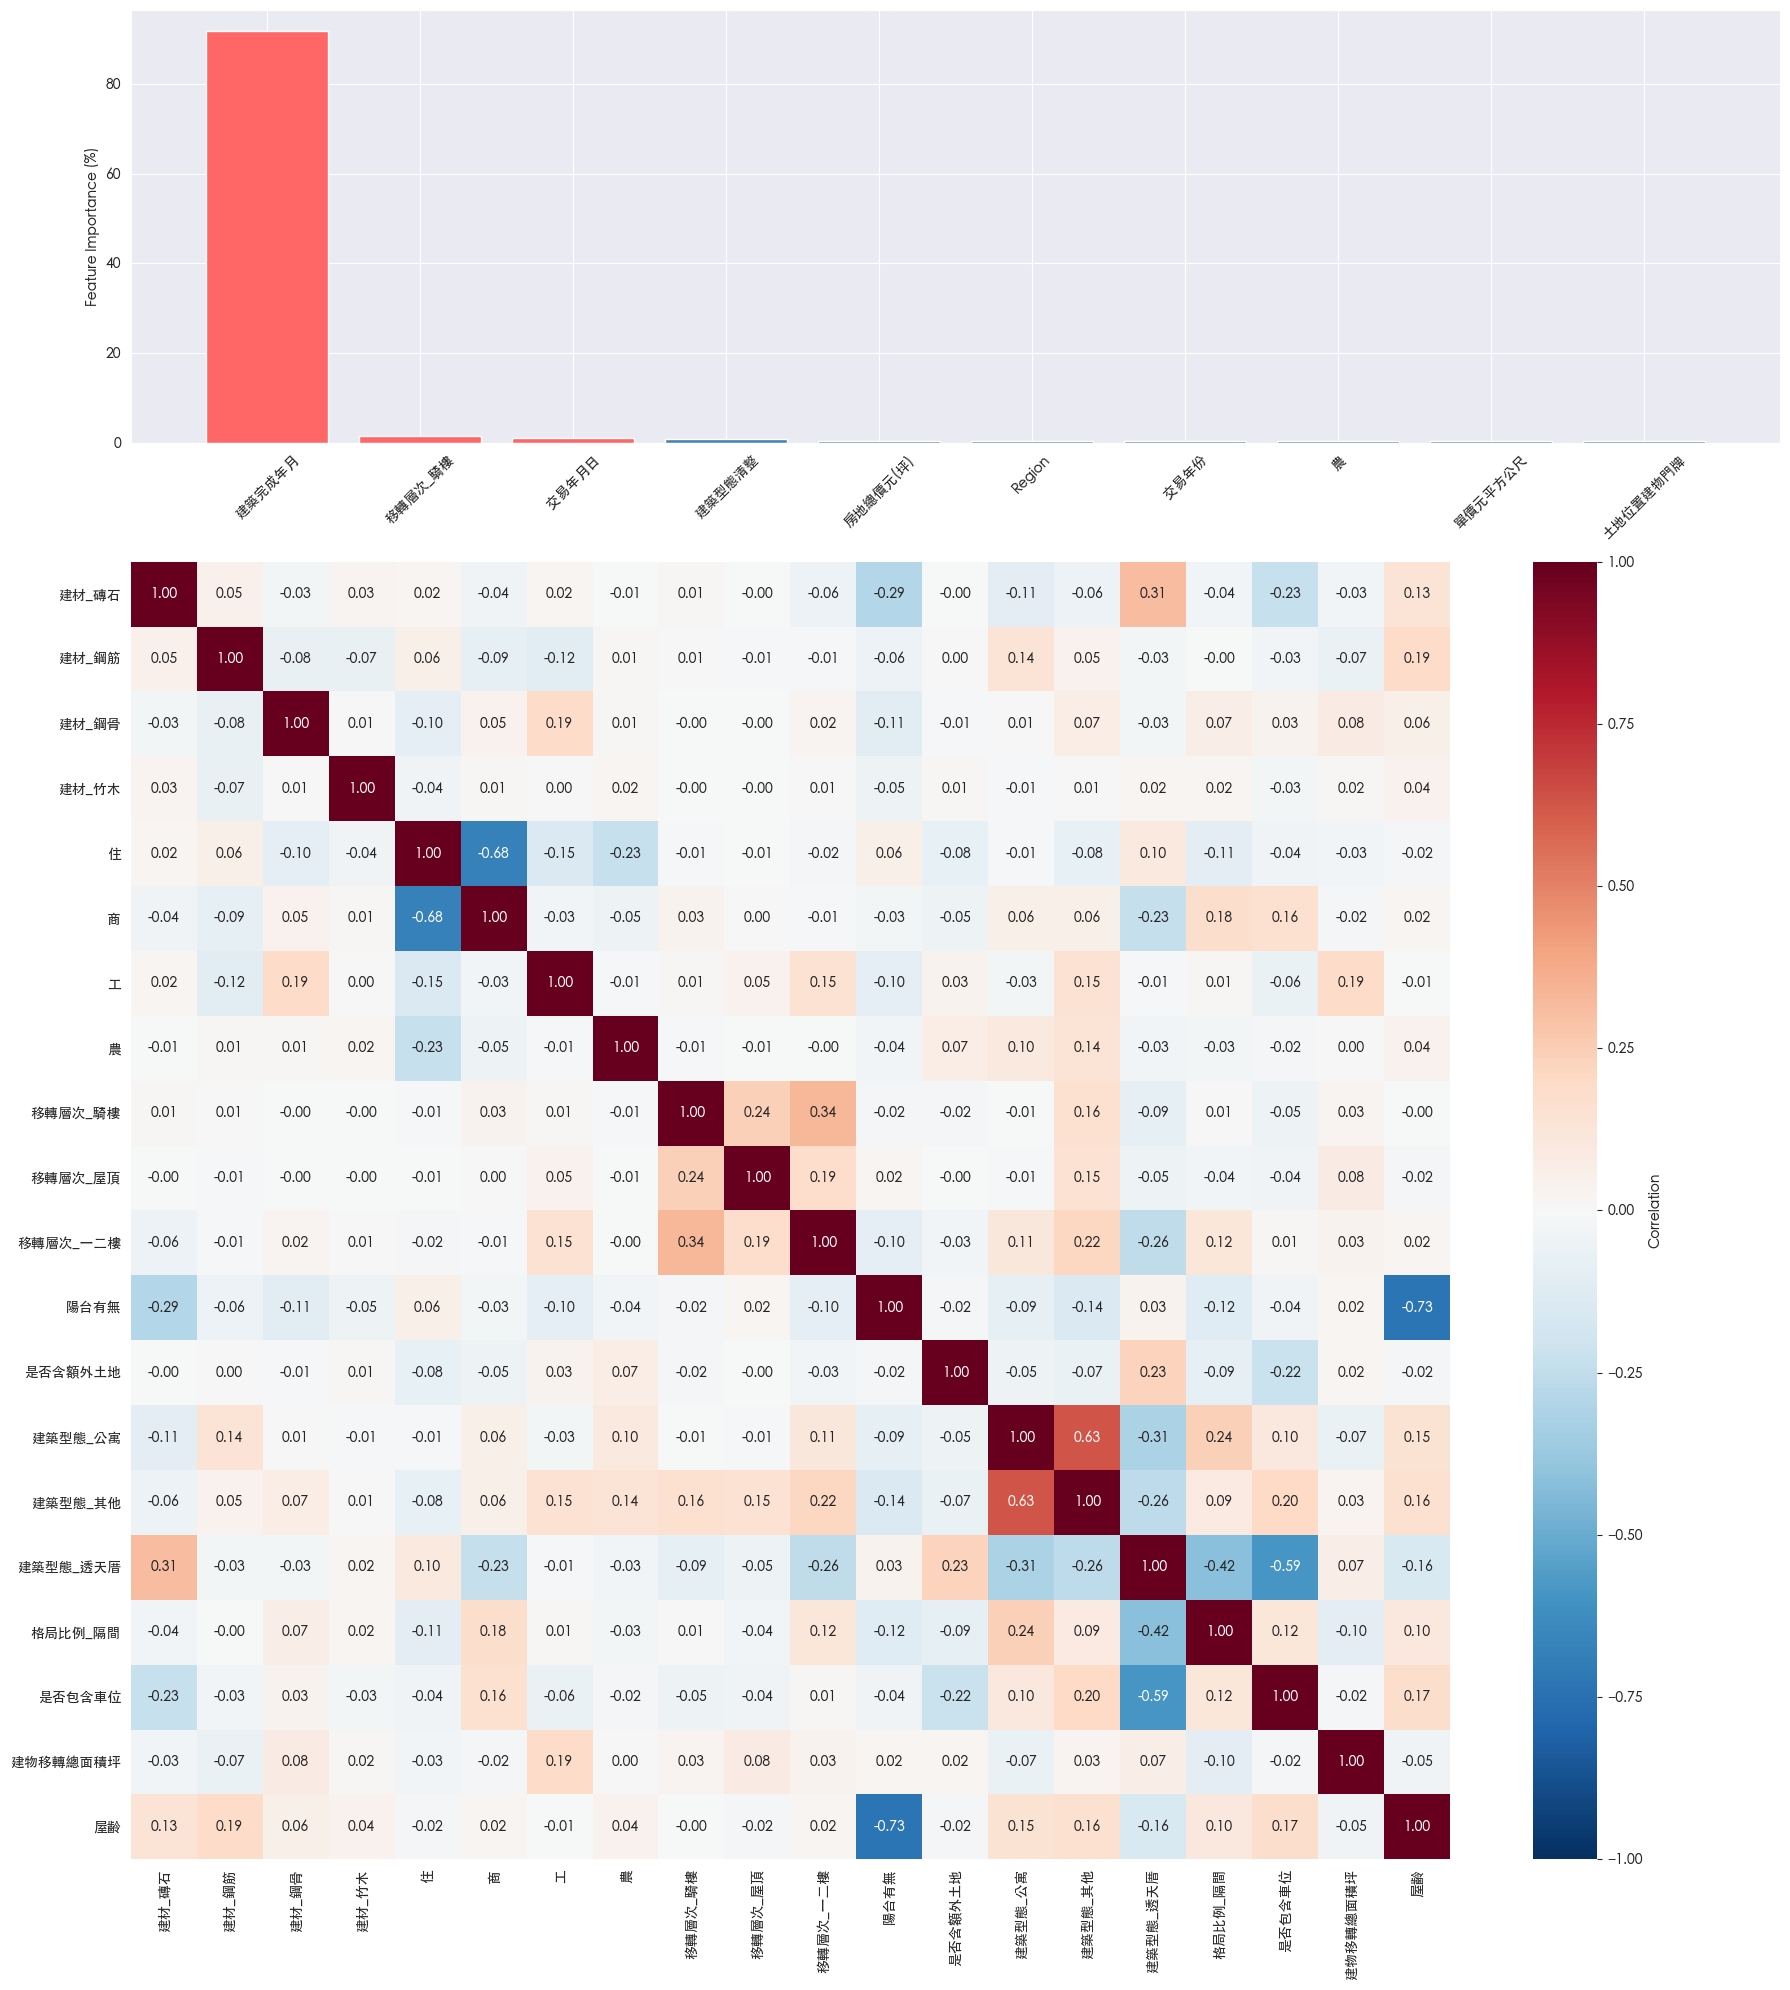

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 計算相關性矩陣
selected_features = [
    '建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', 
    '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '陽台有無', '是否含額外土地', 
    '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '格局比例_隔間', 
    '是否包含車位', '建物移轉總面積坪', '屋齡'
]
correlation_matrix = df[selected_features].corr()

# 顯示重要性結果
features = X.columns
importance = feature_importance * 100  # 將特徵重要性百分比化

# 將特徵和重要性進行排序
sorted_idx = np.argsort(importance)[::-1]  # 降序排列
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# 只取前 10 名特徵
top_n = 10
sorted_features_top_n = sorted_features[:top_n]
sorted_importance_top_n = sorted_importance[:top_n]

# 創建畫布
fig, (ax_bar, ax_heatmap) = plt.subplots(
    2, 1, gridspec_kw={"height_ratios": [1, 3]}, figsize=(18, 20)
)

# 設定顏色，針對前三名特徵進行強調
colors = ['steelblue'] * len(sorted_importance_top_n)
colors[:3] = ['#ff6666', '#ff6666', '#ff6666']  # 強調前三名特徵

# 繪製解釋方差長條圖（重要性已排序），並針對前三名特徵進行顏色調整
ax_bar.bar(range(len(sorted_importance_top_n)), sorted_importance_top_n, color=colors)
ax_bar.set_ylabel("Feature Importance (%)")
ax_bar.set_xticks(range(len(sorted_features_top_n)))
ax_bar.set_xticklabels(sorted_features_top_n, rotation=45)

# 繪製相關性矩陣熱圖，顯示小數點後兩位
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="RdBu_r", center=0, 
    ax=ax_heatmap, cbar_kws={'label': 'Correlation'}, vmin=-1, vmax=1,
    xticklabels=selected_features, yticklabels=selected_features, annot_kws={"size": 10}
)

# 調整佈局
plt.tight_layout()
plt.show()


In [106]:
# 計算相關性矩陣
correlation_matrix = df[['建材_磚石', '建材_鋼筋', '建材_鋼骨', '建材_竹木', '住', '商', '工', '農', 
                         '移轉層次_騎樓', '移轉層次_屋頂', '移轉層次_一二樓', '陽台有無', '是否含額外土地', 
                         '建築型態_公寓', '建築型態_其他', '建築型態_透天厝', '格局比例_隔間', 
                         '是否包含車位', '建物移轉總面積坪', '屋齡']].corr()

# 顯示重要性結果
features = X.columns
importance = feature_importance * 100  # 將特徵重要性百分比化

# 將特徵和重要性進行排序
sorted_idx = np.argsort(importance)[::-1]  # 降序排列
sorted_features = features[sorted_idx]
sorted_importance = importance[sorted_idx]

# 輸出排序後的特徵和對應的重要性
for feature, imp in zip(sorted_features, sorted_importance):
    print(f"{feature}: {imp:.2f}%")

建築完成年月: 91.95%
移轉層次_騎樓: 1.44%
交易年月日: 0.93%
建築型態清整: 0.72%
房地總價元(坪): 0.44%
Region: 0.40%
交易年份: 0.38%
農: 0.36%
單價元平方公尺: 0.34%
土地位置建物門牌: 0.32%
建物移轉總面積平方公尺: 0.27%
陽台有無: 0.26%
KDE_1km: 0.21%
建築型態_公寓: 0.20%
建物移轉總面積坪: 0.20%
有無管理組織: 0.18%
建築型態_住商大樓: 0.13%
鄉鎮市區: 0.13%
KDE_1.5km: 0.13%
是否含額外土地: 0.12%
工: 0.12%
移轉層次_屋頂: 0.11%
商: 0.11%
bad_count: 0.11%
房地總價元: 0.10%
建材_竹木: 0.09%
是否包含車位: 0.05%
good_count: 0.05%
KDE_0.5km: 0.05%
移轉層次_一二樓: 0.03%
格局比例_房: 0.03%
住: 0.02%
交易年_民國: 0.02%
建築完成年: 0.01%
總價元: 0.01%
格局比例_衛: 0.00%
編號: 0.00%
建築型態_透天厝: 0.00%
備註: 0.00%
格局比例_隔間: 0.00%
建築型態_其他: 0.00%
建材_磚石: 0.00%
格局比例_廳: 0.00%
建材_鋼筋: 0.00%
緯度: 0.00%
經度: 0.00%
建材_鋼骨: 0.00%


In [109]:
# 只選擇指定的特徵
X_selected = X[selected_features]

# 標準化 X_selected
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# 使用 Ridge 回歸模型進行預測
model = Ridge()

# 進行交叉驗證
scores = []
for n in range(1, X_scaled.shape[1] + 1):
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    
    # 使用 Ridge 進行迴歸
    score = cross_val_score(model, X_pca, y, cv=10, scoring='neg_mean_squared_error').mean()
    scores.append(score)

# 找出性能最佳的 n_components
best_n_components = np.argmax(scores) + 1

print(f"最佳的 n_components: {best_n_components}")




最佳的 n_components: 18
